# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [ ]:
# TODO: RA & Name 
print('139373: ' + 'Cinthia Cristina Calchi Kleiner')
print('103897: ' + 'Randerson A. Lemos')

## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




In [1]:
# TODO: Load and pr}eprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import SGDRegressor, LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

# df=pd.read_csv("assets/SARESP_train.csv")
# columns = set(df.columns) - set(['nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie'])
# df = df[columns]

In [2]:
pd.options.display.max_columns = None

In [3]:
SEED = 42

### Exploratory Data Analysis:

In [4]:
data_path = "assets/SARESP_train.csv"
df=pd.read_csv(data_path)

/tmp/ipykernel_5873/3974539728.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path)


With a pandas dataframe, it is possible to check how many records we have in the trainning data. With the df.shape method, it is possible to see that the trainning dataset has 120596 lines and 88 columns:

In [5]:
print(df.shape)

(120596, 88)


Reading the first lines of the dataframe:

In [6]:
df.head(10)

,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,MUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,NEC_ESP_1,NEC_ESP_2,NEC_ESP_3,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,JULIO FORTES,B,E,E,E,E,E,E,E,B,A,A,A,A,A,A,B,A,B,B,B,B,A,A,A,A,A,C,C,B,B,B,C,A,B,C,C,C,C,C,C,C,A,C,C,C,C,C,C,C,B,C,B,B,B,B,A,D,C,C,D,C,A,D,Região Metropolitana do Vale do Paraíba e Lito...,GUARATINGUETA,414,LAVRINHAS,901489,EM-3ª série,A,F,11/15/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,41.7,20.8,20.8,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
1,30756614,MESSIAS FREIRE PROFESSOR,B,D,E,C,E,E,E,E,A,A,A,A,A,A,A,B,B,C,C,B,B,A,D,A,D,C,C,C,C,B,B,D,A,A,B,C,C,B,C,B,C,A,C,C,C,B,B,B,C,B,B,B,B,A,A,A,C,C,C,C,C,C,B,Região Metropolitana de São Paulo,SUL 1,100,SAO PAULO,37461,5º Ano EF,A,M,6/7/2010,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,83.3,100.0,66.7,Adequado,Avançado,Adequado
2,26014872,JOSE CONTI,B,E,B,D,E,B,D,C,A,A,A,A,B,A,B,C,B,B,A,A,A,A,A,A,A,D,C,B,A,A,B,B,A,B,B,C,B,C,C,C,B,A,B,B,C,C,B,B,C,D,C,C,B,C,B,A,E,B,C,B,D,C,C,Interior,JAU,348,IGARACU DO TIETE,25963,9º Ano EF,A,F,12/10/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,58.3,37.5,54.2,Básico,Básico,Básico
3,25739025,NAPOLEAO DE CARVALHO FREIRE PROFESSOR,B,D,E,D,C,E,D,D,A,A,B,B,C,B,B,C,B,B,A,B,A,B,B,A,B,D,B,A,B,A,B,B,B,B,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,B,B,D,C,A,A,A,E,C,C,B,C,B,C,Região Metropolitana de São Paulo,CENTRO OESTE,100,SAO PAULO,3924,EM-3ª série,B,M,10/3/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,29.2,29.2,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
4,27363009,RESIDENCIAL BORDON,B,D,E,E,E,E,E,C,A,A,A,A,C,A,B,C,B,B,A,B,A,A,B,A,B,C,C,A,C,B,B,B,B,A,C,C,B,C,C,C,C,A,C,B,C,C,B,B,B,B,B,B,B,B,B,A,E,B,C,A,D,A,D,Região Metropolitana de Campinas,SUMARE,671,SUMARE,576670,9º Ano EF,D,F,4/6/2007,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,79.2,41.7,50.0,Adequado,Abaixo do Básico,Básico
5,29106659,ANA MESQUITA LAURINI,B,C,D,C,C,D,C,C,A,A,B,B,C,B,C,B,B,B,A,B,B,A,B,A,B,A,B,B,A,A,B,A,C,A,B,B,B,B,C,C,B,B,C,C,C,C,C,C,C,C,C,B,B,B,C,A,C,B,B,A,D,D,D,Interior,ITU,233,CABREUVA,36171,9º Ano EF,B,M,12/10/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,66.7,66.7,70.8,Básico,Básico,Básico
6,26920670,HERBERT BALDUS,B,E,D,E,E,C,E,E,A,A,B,A,B,B,A,A,B,C,A,A,B,B,B,A,B,D,B,A,B,A,C,B,C,B,C,C,C,C,C,C,C,B,C,B,C,C,C,C,C,C,D,E,C,B,B,A,D,C,A,A,A,B,C,Região Metropolitana de São Paulo,SUL 3,100,SAO PAULO,5459,EM-3ª série,D,F,9/21/2003,NOITE,NaN,NaN,NaN,NaN,NaN,C,0,50.0,16.7,62.5,Básico,Abaixo do Básico,Básico
7,23566650,TEOFILO DE ANDRADE DOUTOR,A,E,D,D,D,D,D,C,B,A,A,A,A,A,A,A,A,A,B,B,B,A,A,A,A,A,C,C,B,C,C,B,A,B,C,C,C,C,C,C,C,A,B,C,B,B,C,C,B,D,D,E,B,D,B,A,D,C,A,D,C,C,C,Interior,SAO JOAO DA BOA VISTA,639,SAO JOAO DA BOA VISTA,20710,EM-3ª série,A,M,5/20/2004,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,87.5,83.3,79.2,Adequado,Adequado,Adequado
8,29849774,FERNANDO BRASIL PROF,A,E,E,E,E,E,E,E,A,A,A,A,A,A,A,B,B,A,B,A,B,A,B,A,B,B,C,C,C,C,B,A,A,B,C,C,C,C,C,C,C,A,D,B,D,D,D,D,D,B,B,B,B,A,B,A,C,B,C,B,C,A,C,Interior,TAQUARITINGA,674,TABATINGA,22056,5º Ano EF,A,M,3/31/2011,TARDE,NaN,NaN,NaN,NaN,NaN,C,0,29.2,41.7,20.8,Abaixo do Básico,Básico,Abaixo do Básico
9,32568405,ASTROGILDO SILVA PROFESSOR,B,E,D,D,E,E,E,D,A,A,A,A,C,A,B,C,A,B,A,A,A,A,A,A,A,A,C,B,C,B,B,B,A,A,C,B,C,B,C,C,B,B,C,C,C,C,C,C,C,B,C,A,B,A,C,A,D,B,C,B,C,C,C,Região Metropolitana de São Paulo,CENTRO SUL,100,SAO PAULO,4364,5º Ano EF,B,F,5/14/2010,TARDE,NaN,NaN,NaN,NaN,NaN,C,0,75.0,75.0,66.7,Adequado,Adequado,Adequado


Now it is possible to see some summary statistics from the data. With the pandas .describe 
function it is possible to have information about the mean, min,max, count and standard deviation from the data.

In [7]:
df.describe()

,CD_ALUNO,CODMUN,CODESC,NEC_ESP_5,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE
count,1.205960e+05,120596.000000,120596.000000,0.0,120596.000000,120596.000000,120596.000000,120596.000000
mean,2.734087e+07,364.349075,279415.870510,NaN,0.019818,60.151213,52.225829,56.928877
std,2.946464e+06,220.098318,394245.824543,NaN,0.139376,21.730825,21.262466,18.441383
min,1.739548e+07,100.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.529711e+07,100.000000,15568.000000,NaN,0.000000,41.700000,37.500000,45.800000
50%,2.712102e+07,336.000000,35178.000000,NaN,0.000000,62.500000,50.000000,58.300000
75%,2.910558e+07,582.000000,901573.000000,NaN,0.000000,79.200000,66.700000,70.800000
max,3.796186e+07,793.000000,926103.000000,NaN,1.000000,100.000000,100.000000,100.000000


The next step was to visualize the percentage of the number of missing data in each dataframe column. The following code show us the columns that have a null values percentage greater than zero.The variables NEC_ESP_1, NEC_ESP_2 , NEC_ESP_2, NEC_ESP_4 and NEC_ESP_5 do not own 98% of their data. So, these variables will not be considered int the data modeling.

In [8]:
for col in df.columns:
    na_percentage = df[col].isna().sum() / df.shape[0] * 100
    if na_percentage > 0:
        print(f'Column Name: {col}, Null Values Percentage: {na_percentage}')
    

Column Name: NEC_ESP_1, Null Values Percentage: 98.01817639059338
Column Name: NEC_ESP_2, Null Values Percentage: 99.91127400577133
Column Name: NEC_ESP_3, Null Values Percentage: 99.93697966765068
Column Name: NEC_ESP_4, Null Values Percentage: 99.99917078510066
Column Name: NEC_ESP_5, Null Values Percentage: 100.0


**PENSAR O QUE FAZER EM RELACAO A ESTES DADOS. APESAR DE SEREM MUITOS DADOS NULOS, ACREDITO QUE PODEM FAZER DIFERENÇA**

In [9]:
df['NEC_ESP_1'].value_counts(normalize=True)

INTELCTUAL                               0.638912
AUTISTA INFANTIL                         0.081172
FISICA-OUTROS                            0.048536
BAIXA VISAO                              0.039331
SURDEZ LEVE OU MODERADA                  0.035565
SURDEZ SEVERA OU PROFUNDA                0.033473
MULTIPLA                                 0.031799
FISICA-PARALISIA CEREBRAL                0.025941
SINDROME DE ASPERGER                     0.022176
FISICA-CADEIRANTE                        0.014226
SINDROME DE DOWN                         0.009623
TRANSTORNO DESINTEGRATIVO DA INFANCIA    0.009205
ALTAS HABILIDADES/SUPERDOTACAO           0.009205
SINDROME DE RETT                         0.000837
Name: NEC_ESP_1, dtype: float64

For this purpose, the cited columns will be deleteded from the data. The CD_ALUNO variable will also be deleted.

In [10]:
df = df.drop(['NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5', 'CD_ALUNO', 'DT_NASCIMENTO'], axis=1)

In order to analyze the representativeness of the data, some evaluations were made.First, we analyzed how the porcentage of records comming from student that has any special needs. 98% of the data records are from students that dont have any special needs.

In [11]:
df['Tem_Nec'].value_counts(normalize=True)

0    0.980182
1    0.019818
Name: Tem_Nec, dtype: float64

The porcentage of records comming from girls and boys tests wase evaluated. It is possible to note that 52.23 % of the records are from girls and 47.68 % are from boys

In [12]:
df['TP_SEXO'].value_counts(normalize=True)

F    0.523135
M    0.476865
Name: TP_SEXO, dtype: float64

Then, we analyzed the contribution of the different regions evaluated in the chool Performance Assessment System of the State of São Paulo (SARESP). The Mertopolitan region of São Paulo is the region with the highest participation (39.33 %), followed by the interior (32.51 %). The region with the lowest participation was the Metropolitan region of Campinas with (2.87 %) of participation in the records:

In [13]:
df['RegiaoMetropolitana'].value_counts(normalize=True)

Região Metropolitana de São Paulo                          0.393355
Interior                                                   0.325143
Região Metropolitana do Vale do Paraíba e Litoral Norte    0.077507
Região Metropolitana da Baixada Santista                   0.063750
Região Metropolitana de Sorocaba                           0.055856
Região Metropolitana de Ribeirão Preto                     0.055657
Região Metropolitana de Campinas                           0.028732
Name: RegiaoMetropolitana, dtype: float64

By the column MUn analyzes it is possible to verify that 351 cities participate in the sense. The city of São Paulo was the municipality that had the highest participation in the evaluation (28% of the records). 

In [14]:
df['MUN'].value_counts(normalize=True)

SAO PAULO              0.282771
SOROCABA               0.027629
SAO JOSE DOS CAMPOS    0.024337
CARAPICUIBA            0.019039
DIADEMA                0.018550
                         ...   
REDENCAO DA SERRA      0.000017
ESTIVA GERBI           0.000017
ESTRELA DO NORTE       0.000008
ANALANDIA              0.000008
AGUAS DE SAO PEDRO     0.000008
Name: MUN, Length: 351, dtype: float64

As the data from the MUN column and the CODMUN provide the same information, the CODMUN will be removed from the analysis.

In [15]:
df = df.drop(['CODMUN'], axis=1)

Evaluating the School Name and the School Id, it is possible to see that the information of both variables are similar. So we decided to drop the School Name of the data analysis.

In [16]:
df['CODESC'].value_counts(normalize=True)

5289      0.003698
909166    0.002712
2847      0.002645
918593    0.002529
918829    0.002521
            ...   
35488     0.000008
3591      0.000008
268276    0.000008
4911      0.000008
498403    0.000008
Name: CODESC, Length: 2756, dtype: float64

In [17]:
df['NOMESC'].value_counts(normalize=True)

ALBERTO SALOTTI PROF EE                  0.003698
CARMELINDA MARQUES PEREIRA PROFESSORA    0.002712
MIGUEL DE CERVANTES Y SAAVEDRA DOM       0.002645
ANA CECILIA MARTINS PROFESSORA           0.002529
JOSE MARIA PEREZ FERREIRA PROFESSOR      0.002521
                                           ...   
PEDRO CASEMIRO LEITE PROFESSOR           0.000008
EDMUNDO DE CARVALHO DOUTOR               0.000008
ROQUE THEOPHILO                          0.000008
RENATO BRAGA PROFESSOR                   0.000008
BAIRRO DO TURVO                          0.000008
Name: NOMESC, Length: 2746, dtype: float64

In [18]:
df = df.drop(['NOMESC'], axis=1)

 Then, we evaluated the histogram distribuction of the Percentage of correct answers in Portuguese, Mathematics and Natural Sciences Test.With the plots it is possible to conclude that the students perfomed better on Portuguese test, with the percentage in almost 62.5 %. The math test was the test where the students performed worse, with a hit percentage around 50.0 %. In Natural Sciences tests the students had hit percentage around 58.3 %. Comparing the distribution of histograms, it is possible to verify that in the math test that is a greater occurence of lower scores than the other tests.

In [19]:
def multiple_hist_plots(n_lines, n_coluns, columns_names, binwidth, dx, dy):
    '''
    Multiple plots histograms based on columns names
    Args:
        n_lines: number of lines in subplots
        n_columns: number of columns in subplots
        columns_names: list of columns names
    Returns:
        Seaborn histogram subplots
    '''
    
    fig, axes = plt.subplots(n_lines,n_coluns, figsize=(9,4))
    for i,column_name in enumerate(columns_names):
        sns.histplot(data=df[column_name], binwidth=binwidth, kde=False, ax=axes[i]).set(title=column_name)
        fig.axes[i].axvline(x=df[column_name].median(), color='red', ls='--', lw=2.5)
        fig.axes[i].text(df[column_name].median()+dx,dy,f'{df[column_name].median()}',fontsize=12, rotation=90)
        
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    
def multiple_cat_plot(n_lines, n_coluns, columns_names, binwidth):
    '''Multiple plots histograms based on columns names
    Args:
        n_lines: number of lines in subplots
        n_columns: number of columns in subplots
        columns_names: list of columns names
    Returns:
        Seaborn histogram subplots
    '''
    
    fig, axes = plt.subplots(n_lines,n_coluns, figsize=(16,6))
    for i,column_name in enumerate(columns_names):
        sns.histplot(data=df[column_name], binwidth=binwidth, kde=False, ax=axes[i]).set(title=column_name)
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()

Evaluating the data about the the proficiencylevel in Portuguese, Math and Natural Sciences Test it is possible to note that Portuguese and Maths were the subejcts that the students performed better and worse respectively.

In [20]:
df['nivel_profic_lp'].value_counts(normalize=True)

Básico              0.453456
Adequado            0.264876
Abaixo do Básico    0.227255
Avançado            0.054413
Name: nivel_profic_lp, dtype: float64

In [21]:
df['nivel_profic_cie'].value_counts(normalize=True)

Básico              0.441399
Abaixo do Básico    0.296511
Adequado            0.206657
Avançado            0.055433
Name: nivel_profic_cie, dtype: float64

In [22]:
df['nivel_profic_mat'].value_counts(normalize=True)

Básico              0.450214
Abaixo do Básico    0.372243
Adequado            0.142061
Avançado            0.035482
Name: nivel_profic_mat, dtype: float64

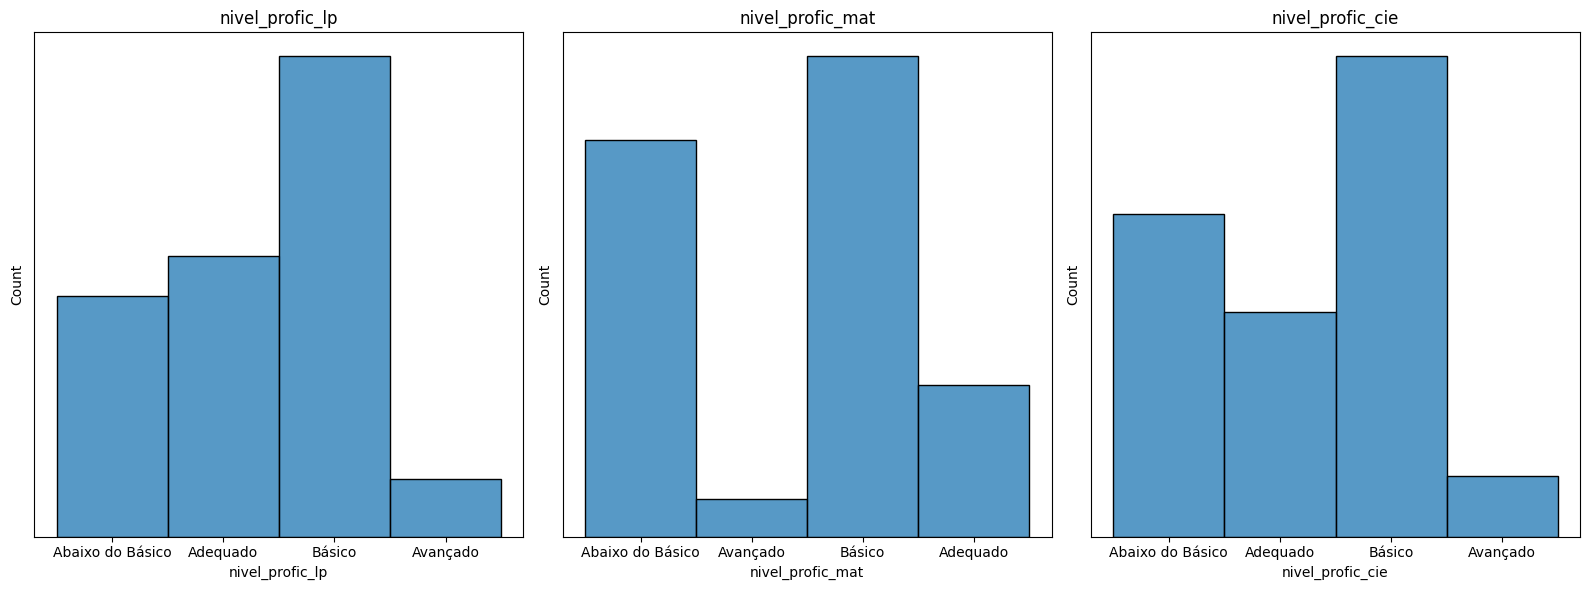

In [23]:
teste_multiple_hist_plots = multiple_cat_plot(1,3,['nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie'], 1)

 Then, we evaluated the histogram distribuction of the Percentage of correct answers in Portuguese, Mathematics and Natural Sciences Test.With the plots it is possible to conclude that the students perfomed better on Portuguese test, with the percentage in almost 62.5 %. The math test was the test where the students performed worse, with a hit percentage around 50.0 %. In Natural Sciences tests the students had hit percentage around 58.3 %. Comparing the distribution of histograms, it is possible to verify that in the math test that is a greater occurence of lower scores than the other tests. So, the datas of percentage of correct answers corroborate with the level of proficiency data.

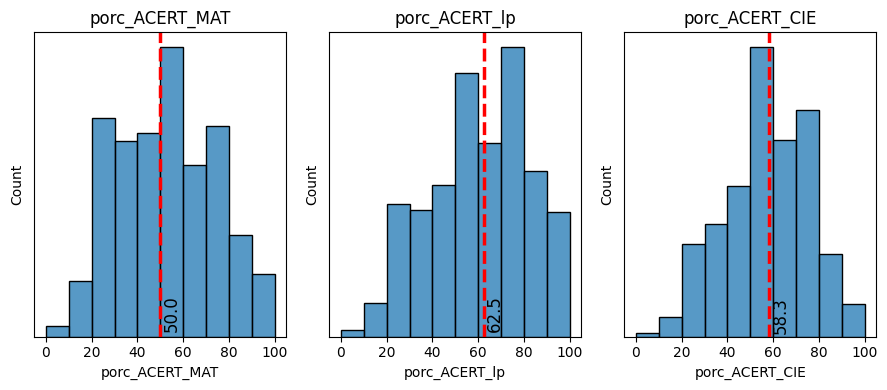

In [24]:
teste_multiple_hist_plots = multiple_hist_plots(1,3,['porc_ACERT_MAT','porc_ACERT_lp','porc_ACERT_CIE'],10,1,700)

## Data Preparation:

In [25]:
df = df.drop(['nivel_profic_lp','nivel_profic_mat','nivel_profic_cie'],axis=1)

Now it is necessary to normalize the data. For this purpose the first step was to evaluate which columns should be normalized. So, were listed columns that had their data type different from objec. The tem_Nec it is a column that don't need to be normalized because its values are 0 or 1.

In [26]:
columns_names = df.columns.to_list()
column_numeric_names = []
for column_name in columns_names:
    if df[str(column_name)].dtype == 'float64':
         column_numeric_names.append(column_name)
print(column_numeric_names)

scaler = MinMaxScaler()
df[['porc_ACERT_lp','porc_ACERT_MAT','porc_ACERT_CIE']] = scaler.fit_transform(df[['porc_ACERT_lp','porc_ACERT_MAT','porc_ACERT_CIE']])

['porc_ACERT_lp', 'porc_ACERT_MAT', 'porc_ACERT_CIE']


### Transforming categorical into OneHotEncoding:

Due to a memory limitation, the 'CODESC' was not able to be transformed in one hot encoding structure

In [28]:
df = df.drop(columns="CODESC")

In [29]:
le = OneHotEncoder()
columns_names = df.columns.to_list()
column_object_names = []
for column_name in columns_names:
    if df[str(column_name)].dtype == object or column_name == "CODESC":
        transformed = le.fit_transform(df[str(column_name)].values[:, None]).toarray()
        for cat in range(transformed.shape[1]):
            df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
        df = df.drop(columns=column_name)

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]
/tmp/ipykernel_5873/1401398475.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{str(column_name)}_{cat}"] = transformed[:, cat]


In [30]:
df

,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,Q1_0,Q1_1,Q1_2,Q1_3,Q2_0,Q2_1,Q2_2,Q2_3,Q2_4,Q3_0,Q3_1,Q3_2,Q3_3,Q3_4,Q4_0,Q4_1,Q4_2,Q4_3,Q4_4,Q5_0,Q5_1,Q5_2,Q5_3,Q5_4,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q9_0,Q9_1,Q9_2,Q10_0,Q10_1,Q10_2,Q11_0,Q11_1,Q11_2,Q12_0,Q12_1,Q12_2,Q13_0,Q13_1,Q13_2,Q14_0,Q14_1,Q14_2,Q15_0,Q15_1,Q15_2,Q16_0,Q16_1,Q16_2,Q17_0,Q17_1,Q17_2,Q18_0,Q18_1,Q18_2,Q19_0,Q19_1,Q19_2,Q20_0,Q20_1,Q20_2,Q21_0,Q21_1,Q21_2,Q22_0,Q22_1,Q23_0,Q23_1,Q23_2,Q23_3,Q24_0,Q24_1,Q25_0,Q25_1,Q25_2,Q25_3,Q26_0,Q26_1,Q26_2,Q26_3,Q27_0,Q27_1,Q27_2,Q28_0,Q28_1,Q28_2,Q29_0,Q29_1,Q29_2,Q30_0,Q30_1,Q30_2,Q31_0,Q31_1,Q31_2,Q32_0,Q32_1,Q32_2,Q32_3,Q33_0,Q33_1,Q33_2,Q33_3,Q34_0,Q34_1,Q35_0,Q35_1,Q35_2,Q36_0,Q36_1,Q36_2,Q37_0,Q37_1,Q37_2,Q38_0,Q38_1,Q38_2,Q39_0,Q39_1,Q39_2,Q40_0,Q40_1,Q40_2,Q41_0,Q41_1,Q41_2,Q42_0,Q42_1,Q42_2,Q42_3,Q42_4,Q43_0,Q43_1,Q43_2,Q43_3,Q44_0,Q44_1,Q44_2,Q44_3,Q45_0,Q45_1,Q45_2,Q45_3,Q46_0,Q46_1,Q46_2,Q46_3,Q47_0,Q47_1,Q47_2,Q47_3,Q48_0,Q48_1,Q48_2,Q48_3,Q49_0,Q49_1,Q49_2,Q49_3,Q50_0,Q50_1,Q50_2,Q50_3,Q50_4,Q51_0,Q51_1,Q51_2,Q51_3,Q51_4,Q52_0,Q52_1,Q52_2,Q52_3,Q52_4,Q53_0,Q53_1,Q53_2,Q53_3,Q53_4,Q54_0,Q54_1,Q54_2,Q54_3,Q54_4,Q55_0,Q55_1,Q55_2,Q55_3,Q55_4,Q56_0,Q56_1,Q56_2,Q56_3,Q56_4,Q57_0,Q57_1,Q57_2,Q57_3,Q57_4,Q58_0,Q58_1,Q58_2,Q59_0,Q59_1,Q59_2,Q60_0,Q60_1,Q60_2,Q60_3,Q61_0,Q61_1,Q61_2,Q61_3,Q62_0,Q62_1,Q62_2,Q62_3,Q63_0,Q63_1,Q63_2,Q63_3,RegiaoMetropolitana_0,RegiaoMetropolitana_1,RegiaoMetropolitana_2,RegiaoMetropolitana_3,RegiaoMetropolitana_4,RegiaoMetropolitana_5,RegiaoMetropolitana_6,DE_0,DE_1,DE_2,DE_3,DE_4,DE_5,DE_6,DE_7,DE_8,DE_9,DE_10,DE_11,DE_12,DE_13,DE_14,DE_15,DE_16,DE_17,DE_18,DE_19,DE_20,DE_21,DE_22,DE_23,DE_24,DE_25,DE_26,DE_27,DE_28,DE_29,DE_30,DE_31,DE_32,DE_33,DE_34,DE_35,DE_36,DE_37,DE_38,DE_39,DE_40,DE_41,DE_42,DE_43,DE_44,DE_45,DE_46,DE_47,DE_48,DE_49,DE_50,DE_51,DE_52,DE_53,DE_54,DE_55,DE_56,DE_57,DE_58,DE_59,DE_60,DE_61,DE_62,DE_63,DE_64,MUN_0,MUN_1,MUN_2,MUN_3,MUN_4,MUN_5,MUN_6,MUN_7,MUN_8,MUN_9,MUN_10,MUN_11,MUN_12,MUN_13,MUN_14,MUN_15,MUN_16,MUN_17,MUN_18,MUN_19,MUN_20,MUN_21,MUN_22,MUN_23,MUN_24,MUN_25,MUN_26,MUN_27,MUN_28,MUN_29,MUN_30,MUN_31,MUN_32,MUN_33,MUN_34,MUN_35,MUN_36,MUN_37,MUN_38,MUN_39,MUN_40,MUN_41,MUN_42,MUN_43,MUN_44,MUN_45,MUN_46,MUN_47,MUN_48,MUN_49,MUN_50,MUN_51,MUN_52,MUN_53,MUN_54,MUN_55,MUN_56,MUN_57,MUN_58,MUN_59,MUN_60,MUN_61,MUN_62,MUN_63,MUN_64,MUN_65,MUN_66,MUN_67,MUN_68,MUN_69,MUN_70,MUN_71,MUN_72,MUN_73,MUN_74,MUN_75,MUN_76,MUN_77,MUN_78,MUN_79,MUN_80,MUN_81,MUN_82,MUN_83,MUN_84,MUN_85,MUN_86,MUN_87,MUN_88,MUN_89,MUN_90,MUN_91,MUN_92,MUN_93,MUN_94,MUN_95,MUN_96,MUN_97,MUN_98,MUN_99,MUN_100,MUN_101,MUN_102,MUN_103,MUN_104,MUN_105,MUN_106,MUN_107,MUN_108,MUN_109,MUN_110,MUN_111,MUN_112,MUN_113,MUN_114,MUN_115,MUN_116,MUN_117,MUN_118,MUN_119,MUN_120,MUN_121,MUN_122,MUN_123,MUN_124,MUN_125,MUN_126,MUN_127,MUN_128,MUN_129,MUN_130,MUN_131,MUN_132,MUN_133,MUN_134,MUN_135,MUN_136,MUN_137,MUN_138,MUN_139,MUN_140,MUN_141,MUN_142,MUN_143,MUN_144,MUN_145,MUN_146,MUN_147,MUN_148,MUN_149,MUN_150,MUN_151,MUN_152,MUN_153,MUN_154,MUN_155,MUN_156,MUN_157,MUN_158,MUN_159,MUN_160,MUN_161,MUN_162,MUN_163,MUN_164,MUN_165,MUN_166,MUN_167,MUN_168,MUN_169,MUN_170,MUN_171,MUN_172,MUN_173,MUN_174,MUN_175,MUN_176,MUN_177,MUN_178,MUN_179,MUN_180,MUN_181,MUN_182,MUN_183,MUN_184,MUN_185,MUN_186,MUN_187,MUN_188,MUN_189,MUN_190,MUN_191,MUN_192,MUN_193,MUN_194,MUN_195,MUN_196,MUN_197,MUN_198,MUN_199,MUN_200,MUN_201,MUN_202,MUN_203,MUN_204,MUN_205,MUN_206,MUN_207,MUN_208,MUN_209,MUN_210,MUN_211,MUN_212,MUN_213,MUN_214,MUN_215,MUN_216,MUN_217,MUN_218,MUN_219,MUN_220,MUN_221,MUN_222,MUN_223,MUN_224,MUN_225,MUN_226,MUN_227,MUN_228,MUN_229,MUN_230,MUN_231,MUN_232,MUN_233,MUN_234,MUN_235,MUN_236,MUN_237,MUN_238,MUN_239,MUN_240,MUN_241,MUN_242,MUN_243,MUN_244,MUN_245,MUN_246,MUN_247,MUN_248,MUN_249,MUN_250,MUN_251,MUN_252,MUN_253,MUN_254,MUN_255,MUN_256,MUN_257,MUN_258,MUN_259,MUN_260,MUN_261,MUN_262,MUN_263,MUN_264,MUN_265,MUN_266,MUN_267,MUN_268,MUN

In [32]:
df.describe()

,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,Q1_0,Q1_1,Q1_2,Q1_3,Q2_0,Q2_1,Q2_2,Q2_3,Q2_4,Q3_0,Q3_1,Q3_2,Q3_3,Q3_4,Q4_0,Q4_1,Q4_2,Q4_3,Q4_4,Q5_0,Q5_1,Q5_2,Q5_3,Q5_4,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q9_0,Q9_1,Q9_2,Q10_0,Q10_1,Q10_2,Q11_0,Q11_1,Q11_2,Q12_0,Q12_1,Q12_2,Q13_0,Q13_1,Q13_2,Q14_0,Q14_1,Q14_2,Q15_0,Q15_1,Q15_2,Q16_0,Q16_1,Q16_2,Q17_0,Q17_1,Q17_2,Q18_0,Q18_1,Q18_2,Q19_0,Q19_1,Q19_2,Q20_0,Q20_1,Q20_2,Q21_0,Q21_1,Q21_2,Q22_0,Q22_1,Q23_0,Q23_1,Q23_2,Q23_3,Q24_0,Q24_1,Q25_0,Q25_1,Q25_2,Q25_3,Q26_0,Q26_1,Q26_2,Q26_3,Q27_0,Q27_1,Q27_2,Q28_0,Q28_1,Q28_2,Q29_0,Q29_1,Q29_2,Q30_0,Q30_1,Q30_2,Q31_0,Q31_1,Q31_2,Q32_0,Q32_1,Q32_2,Q32_3,Q33_0,Q33_1,Q33_2,Q33_3,Q34_0,Q34_1,Q35_0,Q35_1,Q35_2,Q36_0,Q36_1,Q36_2,Q37_0,Q37_1,Q37_2,Q38_0,Q38_1,Q38_2,Q39_0,Q39_1,Q39_2,Q40_0,Q40_1,Q40_2,Q41_0,Q41_1,Q41_2,Q42_0,Q42_1,Q42_2,Q42_3,Q42_4,Q43_0,Q43_1,Q43_2,Q43_3,Q44_0,Q44_1,Q44_2,Q44_3,Q45_0,Q45_1,Q45_2,Q45_3,Q46_0,Q46_1,Q46_2,Q46_3,Q47_0,Q47_1,Q47_2,Q47_3,Q48_0,Q48_1,Q48_2,Q48_3,Q49_0,Q49_1,Q49_2,Q49_3,Q50_0,Q50_1,Q50_2,Q50_3,Q50_4,Q51_0,Q51_1,Q51_2,Q51_3,Q51_4,Q52_0,Q52_1,Q52_2,Q52_3,Q52_4,Q53_0,Q53_1,Q53_2,Q53_3,Q53_4,Q54_0,Q54_1,Q54_2,Q54_3,Q54_4,Q55_0,Q55_1,Q55_2,Q55_3,Q55_4,Q56_0,Q56_1,Q56_2,Q56_3,Q56_4,Q57_0,Q57_1,Q57_2,Q57_3,Q57_4,Q58_0,Q58_1,Q58_2,Q59_0,Q59_1,Q59_2,Q60_0,Q60_1,Q60_2,Q60_3,Q61_0,Q61_1,Q61_2,Q61_3,Q62_0,Q62_1,Q62_2,Q62_3,Q63_0,Q63_1,Q63_2,Q63_3,RegiaoMetropolitana_0,RegiaoMetropolitana_1,RegiaoMetropolitana_2,RegiaoMetropolitana_3,RegiaoMetropolitana_4,RegiaoMetropolitana_5,RegiaoMetropolitana_6,DE_0,DE_1,DE_2,DE_3,DE_4,DE_5,DE_6,DE_7,DE_8,DE_9,DE_10,DE_11,DE_12,DE_13,DE_14,DE_15,DE_16,DE_17,DE_18,DE_19,DE_20,DE_21,DE_22,DE_23,DE_24,DE_25,DE_26,DE_27,DE_28,DE_29,DE_30,DE_31,DE_32,DE_33,DE_34,DE_35,DE_36,DE_37,DE_38,DE_39,DE_40,DE_41,DE_42,DE_43,DE_44,DE_45,DE_46,DE_47,DE_48,DE_49,DE_50,DE_51,DE_52,DE_53,DE_54,DE_55,DE_56,DE_57,DE_58,DE_59,DE_60,DE_61,DE_62,DE_63,DE_64,MUN_0,MUN_1,MUN_2,MUN_3,MUN_4,MUN_5,MUN_6,MUN_7,MUN_8,MUN_9,MUN_10,MUN_11,MUN_12,MUN_13,MUN_14,MUN_15,MUN_16,MUN_17,MUN_18,MUN_19,MUN_20,MUN_21,MUN_22,MUN_23,MUN_24,MUN_25,MUN_26,MUN_27,MUN_28,MUN_29,MUN_30,MUN_31,MUN_32,MUN_33,MUN_34,MUN_35,MUN_36,MUN_37,MUN_38,MUN_39,MUN_40,MUN_41,MUN_42,MUN_43,MUN_44,MUN_45,MUN_46,MUN_47,MUN_48,MUN_49,MUN_50,MUN_51,MUN_52,MUN_53,MUN_54,MUN_55,MUN_56,MUN_57,MUN_58,MUN_59,MUN_60,MUN_61,MUN_62,MUN_63,MUN_64,MUN_65,MUN_66,MUN_67,MUN_68,MUN_69,MUN_70,MUN_71,MUN_72,MUN_73,MUN_74,MUN_75,MUN_76,MUN_77,MUN_78,MUN_79,MUN_80,MUN_81,MUN_82,MUN_83,MUN_84,MUN_85,MUN_86,MUN_87,MUN_88,MUN_89,MUN_90,MUN_91,MUN_92,MUN_93,MUN_94,MUN_95,MUN_96,MUN_97,MUN_98,MUN_99,MUN_100,MUN_101,MUN_102,MUN_103,MUN_104,MUN_105,MUN_106,MUN_107,MUN_108,MUN_109,MUN_110,MUN_111,MUN_112,MUN_113,MUN_114,MUN_115,MUN_116,MUN_117,MUN_118,MUN_119,MUN_120,MUN_121,MUN_122,MUN_123,MUN_124,MUN_125,MUN_126,MUN_127,MUN_128,MUN_129,MUN_130,MUN_131,MUN_132,MUN_133,MUN_134,MUN_135,MUN_136,MUN_137,MUN_138,MUN_139,MUN_140,MUN_141,MUN_142,MUN_143,MUN_144,MUN_145,MUN_146,MUN_147,MUN_148,MUN_149,MUN_150,MUN_151,MUN_152,MUN_153,MUN_154,MUN_155,MUN_156,MUN_157,MUN_158,MUN_159,MUN_160,MUN_161,MUN_162,MUN_163,MUN_164,MUN_165,MUN_166,MUN_167,MUN_168,MUN_169,MUN_170,MUN_171,MUN_172,MUN_173,MUN_174,MUN_175,MUN_176,MUN_177,MUN_178,MUN_179,MUN_180,MUN_181,MUN_182,MUN_183,MUN_184,MUN_185,MUN_186,MUN_187,MUN_188,MUN_189,MUN_190,MUN_191,MUN_192,MUN_193,MUN_194,MUN_195,MUN_196,MUN_197,MUN_198,MUN_199,MUN_200,MUN_201,MUN_202,MUN_203,MUN_204,MUN_205,MUN_206,MUN_207,MUN_208,MUN_209,MUN_210,MUN_211,MUN_212,MUN_213,MUN_214,MUN_215,MUN_216,MUN_217,MUN_218,MUN_219,MUN_220,MUN_221,MUN_222,MUN_223,MUN_224,MUN_225,MUN_226,MUN_227,MUN_228,MUN_229,MUN_230,MUN_231,MUN_232,MUN_233,MUN_234,MUN_235,MUN_236,MUN_237,MUN_238,MUN_239,MUN_240,MUN_241,MUN_242,MUN_243,MUN_244,MUN_245,MUN_246,MUN_247,MUN_248,MUN_249,MUN_250,MUN_251,MUN_252,MUN_253,MUN_254,MUN_255,MUN_256,MUN_257,MUN_258,MUN_259,MUN_260,MUN_261,MUN_262,MUN_263,MUN_264,MUN_265,MUN_266,MUN_267,MUN_268,MUN

### Dropping the target variables:

After the preprocessing step, it is necessary to define the target values. For this purporse, the X structure will be composed by all columns except the target variables.While the y structure will be composed only by the target. 

In [33]:
#Portuguese:
X_lp = df.drop(['porc_ACERT_lp'],axis=1)
y_lp = df[['porc_ACERT_lp']].values

#Math
X_math = df.drop(['porc_ACERT_MAT', 'porc_ACERT_lp','porc_ACERT_CIE'],axis=1)
y_math = df[['porc_ACERT_MAT']].values

#Sciences:
X_cie = df.drop(['porc_ACERT_CIE','porc_ACERT_MAT', 'porc_ACERT_lp'],axis=1)
y_cie = df[['porc_ACERT_CIE']].values

### Train Validation Split:

In order to validate our training step, we devided the data into train and validation sets with 80 and 20% of the data respectivily. For this, we used the train_test_split fucntion from sklearn and we set a random_state in order to ensure reproducibility.

In [35]:
#Portuguese:
x_train_lp, x_val_lp, y_train_lp, y_val_lp = train_test_split(X_lp, y_lp,test_size=0.20,random_state=SEED)

#Math
x_train_math, x_val_math, y_train_math, y_val_math = train_test_split(X_math, y_math,test_size=0.20,random_state=SEED)

#Sciences:
x_train_cie, x_val_cie, y_train_cie, y_val_cie = train_test_split(X_cie, y_cie,test_size=0.20,random_state=SEED)

In [36]:
# target_columns = set(['porc_ACERT_lp', 'porc_ACERT_MAT', 'porc_ACERT_CIE'])
# featur_columns = columns - target_columns

# features = df[featur_columns]
# targets = df[target_columns]

In [37]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.

In order to train the model, it is necessary to create an object o

## Model Trainning:

In [38]:
# TODO: Linear Regression. You can use scikit-learn libraries.

In [39]:
def model_train_and_evaluation(x_train, y_train, x_val, y_val, learning_rate):
    
    #Creating an object of the model
    model = SGDRegressor(max_iter=2000,random_state=SEED, learning_rate='invscaling', eta0=learning_rate)
    #Fitting the model with the trainning data
    model.fit(x_train, y_train)
    
    print(f'Model intercept value : {model.intercept_}')
    print(f' Coeficients : {model.coef_}')
    
    y_pred = model.predict(x_val)
    
    print('\n')
    
    print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
    print(f"R2 Score: {r2_score(y_val, y_pred)}")


In [40]:
x_train_math

,Tem_Nec,Q1_0,Q1_1,Q1_2,Q1_3,Q2_0,Q2_1,Q2_2,Q2_3,Q2_4,Q3_0,Q3_1,Q3_2,Q3_3,Q3_4,Q4_0,Q4_1,Q4_2,Q4_3,Q4_4,Q5_0,Q5_1,Q5_2,Q5_3,Q5_4,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q9_0,Q9_1,Q9_2,Q10_0,Q10_1,Q10_2,Q11_0,Q11_1,Q11_2,Q12_0,Q12_1,Q12_2,Q13_0,Q13_1,Q13_2,Q14_0,Q14_1,Q14_2,Q15_0,Q15_1,Q15_2,Q16_0,Q16_1,Q16_2,Q17_0,Q17_1,Q17_2,Q18_0,Q18_1,Q18_2,Q19_0,Q19_1,Q19_2,Q20_0,Q20_1,Q20_2,Q21_0,Q21_1,Q21_2,Q22_0,Q22_1,Q23_0,Q23_1,Q23_2,Q23_3,Q24_0,Q24_1,Q25_0,Q25_1,Q25_2,Q25_3,Q26_0,Q26_1,Q26_2,Q26_3,Q27_0,Q27_1,Q27_2,Q28_0,Q28_1,Q28_2,Q29_0,Q29_1,Q29_2,Q30_0,Q30_1,Q30_2,Q31_0,Q31_1,Q31_2,Q32_0,Q32_1,Q32_2,Q32_3,Q33_0,Q33_1,Q33_2,Q33_3,Q34_0,Q34_1,Q35_0,Q35_1,Q35_2,Q36_0,Q36_1,Q36_2,Q37_0,Q37_1,Q37_2,Q38_0,Q38_1,Q38_2,Q39_0,Q39_1,Q39_2,Q40_0,Q40_1,Q40_2,Q41_0,Q41_1,Q41_2,Q42_0,Q42_1,Q42_2,Q42_3,Q42_4,Q43_0,Q43_1,Q43_2,Q43_3,Q44_0,Q44_1,Q44_2,Q44_3,Q45_0,Q45_1,Q45_2,Q45_3,Q46_0,Q46_1,Q46_2,Q46_3,Q47_0,Q47_1,Q47_2,Q47_3,Q48_0,Q48_1,Q48_2,Q48_3,Q49_0,Q49_1,Q49_2,Q49_3,Q50_0,Q50_1,Q50_2,Q50_3,Q50_4,Q51_0,Q51_1,Q51_2,Q51_3,Q51_4,Q52_0,Q52_1,Q52_2,Q52_3,Q52_4,Q53_0,Q53_1,Q53_2,Q53_3,Q53_4,Q54_0,Q54_1,Q54_2,Q54_3,Q54_4,Q55_0,Q55_1,Q55_2,Q55_3,Q55_4,Q56_0,Q56_1,Q56_2,Q56_3,Q56_4,Q57_0,Q57_1,Q57_2,Q57_3,Q57_4,Q58_0,Q58_1,Q58_2,Q59_0,Q59_1,Q59_2,Q60_0,Q60_1,Q60_2,Q60_3,Q61_0,Q61_1,Q61_2,Q61_3,Q62_0,Q62_1,Q62_2,Q62_3,Q63_0,Q63_1,Q63_2,Q63_3,RegiaoMetropolitana_0,RegiaoMetropolitana_1,RegiaoMetropolitana_2,RegiaoMetropolitana_3,RegiaoMetropolitana_4,RegiaoMetropolitana_5,RegiaoMetropolitana_6,DE_0,DE_1,DE_2,DE_3,DE_4,DE_5,DE_6,DE_7,DE_8,DE_9,DE_10,DE_11,DE_12,DE_13,DE_14,DE_15,DE_16,DE_17,DE_18,DE_19,DE_20,DE_21,DE_22,DE_23,DE_24,DE_25,DE_26,DE_27,DE_28,DE_29,DE_30,DE_31,DE_32,DE_33,DE_34,DE_35,DE_36,DE_37,DE_38,DE_39,DE_40,DE_41,DE_42,DE_43,DE_44,DE_45,DE_46,DE_47,DE_48,DE_49,DE_50,DE_51,DE_52,DE_53,DE_54,DE_55,DE_56,DE_57,DE_58,DE_59,DE_60,DE_61,DE_62,DE_63,DE_64,MUN_0,MUN_1,MUN_2,MUN_3,MUN_4,MUN_5,MUN_6,MUN_7,MUN_8,MUN_9,MUN_10,MUN_11,MUN_12,MUN_13,MUN_14,MUN_15,MUN_16,MUN_17,MUN_18,MUN_19,MUN_20,MUN_21,MUN_22,MUN_23,MUN_24,MUN_25,MUN_26,MUN_27,MUN_28,MUN_29,MUN_30,MUN_31,MUN_32,MUN_33,MUN_34,MUN_35,MUN_36,MUN_37,MUN_38,MUN_39,MUN_40,MUN_41,MUN_42,MUN_43,MUN_44,MUN_45,MUN_46,MUN_47,MUN_48,MUN_49,MUN_50,MUN_51,MUN_52,MUN_53,MUN_54,MUN_55,MUN_56,MUN_57,MUN_58,MUN_59,MUN_60,MUN_61,MUN_62,MUN_63,MUN_64,MUN_65,MUN_66,MUN_67,MUN_68,MUN_69,MUN_70,MUN_71,MUN_72,MUN_73,MUN_74,MUN_75,MUN_76,MUN_77,MUN_78,MUN_79,MUN_80,MUN_81,MUN_82,MUN_83,MUN_84,MUN_85,MUN_86,MUN_87,MUN_88,MUN_89,MUN_90,MUN_91,MUN_92,MUN_93,MUN_94,MUN_95,MUN_96,MUN_97,MUN_98,MUN_99,MUN_100,MUN_101,MUN_102,MUN_103,MUN_104,MUN_105,MUN_106,MUN_107,MUN_108,MUN_109,MUN_110,MUN_111,MUN_112,MUN_113,MUN_114,MUN_115,MUN_116,MUN_117,MUN_118,MUN_119,MUN_120,MUN_121,MUN_122,MUN_123,MUN_124,MUN_125,MUN_126,MUN_127,MUN_128,MUN_129,MUN_130,MUN_131,MUN_132,MUN_133,MUN_134,MUN_135,MUN_136,MUN_137,MUN_138,MUN_139,MUN_140,MUN_141,MUN_142,MUN_143,MUN_144,MUN_145,MUN_146,MUN_147,MUN_148,MUN_149,MUN_150,MUN_151,MUN_152,MUN_153,MUN_154,MUN_155,MUN_156,MUN_157,MUN_158,MUN_159,MUN_160,MUN_161,MUN_162,MUN_163,MUN_164,MUN_165,MUN_166,MUN_167,MUN_168,MUN_169,MUN_170,MUN_171,MUN_172,MUN_173,MUN_174,MUN_175,MUN_176,MUN_177,MUN_178,MUN_179,MUN_180,MUN_181,MUN_182,MUN_183,MUN_184,MUN_185,MUN_186,MUN_187,MUN_188,MUN_189,MUN_190,MUN_191,MUN_192,MUN_193,MUN_194,MUN_195,MUN_196,MUN_197,MUN_198,MUN_199,MUN_200,MUN_201,MUN_202,MUN_203,MUN_204,MUN_205,MUN_206,MUN_207,MUN_208,MUN_209,MUN_210,MUN_211,MUN_212,MUN_213,MUN_214,MUN_215,MUN_216,MUN_217,MUN_218,MUN_219,MUN_220,MUN_221,MUN_222,MUN_223,MUN_224,MUN_225,MUN_226,MUN_227,MUN_228,MUN_229,MUN_230,MUN_231,MUN_232,MUN_233,MUN_234,MUN_235,MUN_236,MUN_237,MUN_238,MUN_239,MUN_240,MUN_241,MUN_242,MUN_243,MUN_244,MUN_245,MUN_246,MUN_247,MUN_248,MUN_249,MUN_250,MUN_251,MUN_252,MUN_253,MUN_254,MUN_255,MUN_256,MUN_257,MUN_258,MUN_259,MUN_260,MUN_261,MUN_262,MUN_263,MUN_264,MUN_265,MUN_266,MUN_267,MUN_268,MUN_269,MUN_270,MUN_271,MUN_272,MUN_273,MUN_274

In [41]:
math_test = model_train_and_evaluation(x_train_math, y_train_math.squeeze(1),x_val_math, y_val_math.squeeze(1), 0.001)

Model intercept value : [0.01702381]
 Coeficients : [-4.82894641e-02  5.89649748e-03 -5.36516570e-03  1.53373795e-02
  1.10169277e-03 -9.01712512e-03  3.82078938e-03  1.45184042e-02
  1.27105449e-02 -5.06220930e-03 -9.53924333e-03 -5.38278007e-03
  6.82010820e-03  1.38578084e-02  1.12145108e-02 -1.40228502e-02
 -2.08848038e-03  9.04094471e-03  1.55321260e-02  8.50866390e-03
 -5.87031504e-03  1.76891805e-03  9.44470899e-03  1.22542353e-02
 -6.27143279e-04 -2.62088928e-03  5.95151612e-03  1.26054380e-02
  9.09208421e-03 -8.05774499e-03 -9.95624013e-03  6.11910189e-03
  1.38020609e-02  8.40620745e-03 -1.40072605e-03 -4.58683501e-03
  1.49361314e-03  1.29878401e-02  9.90616724e-03 -2.83038144e-03
  1.88331724e-02  5.92218427e-03 -7.78495259e-03  5.65993491e-02
 -2.39005339e-02 -1.57284112e-02 -7.13173756e-03  7.53439678e-03
  1.65677448e-02  3.67333022e-03  7.30276504e-03  5.99430879e-03
 -1.03803584e-02  4.53449570e-03  2.28162668e-02  7.57519723e-03
  8.91169949e-03  4.83507334e-04  9.26

In [42]:
lp_test = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.0001)

/home/cinthiakleiner/anaconda3/envs/mc886-t2/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model intercept value : [0.01639797]
 Coeficients : [-7.29371368e-03  7.25673381e-02  6.77837609e-02  4.14592329e-03
  4.77812842e-03  6.94112481e-03  5.27398877e-04 -1.86102746e-03
  7.92792727e-04  7.80918074e-03  1.01433450e-02 -4.91715658e-04
 -2.17410152e-03 -1.36476176e-03  2.54474158e-03  1.04843409e-02
  6.90235622e-03 -3.29016529e-03  1.60062780e-03  6.47518320e-03
  1.04151342e-02  1.19179548e-03 -1.53863287e-03  2.00269862e-03
  9.16839267e-03  8.84906041e-03 -2.08894343e-03 -1.79560943e-03
  3.46987792e-03  9.26234320e-03  8.56172996e-03 -3.10576625e-03
 -2.53102294e-03  2.90904161e-03  1.05471010e-02  8.95630381e-03
 -3.48884810e-03  2.83123371e-03  4.53730738e-03  1.10244324e-02
  6.32988414e-03 -8.33028225e-03  1.78423883e-02  3.85074903e-03
 -5.30056195e-03  3.47130081e-02 -1.45303497e-02 -3.79008301e-03
  1.54217457e-03  7.90457785e-03  6.94582297e-03  7.52325334e-03
  7.36504416e-03  1.50427790e-03 -2.82825005e-03  3.26766163e-03
  1.59531638e-02  9.14834237e-03  6.87

In [43]:
cie_test = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.001)

/home/cinthiakleiner/anaconda3/envs/mc886-t2/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model intercept value : [0.01856402]
 Coeficients : [-3.89681152e-02  9.47063829e-04 -2.70366007e-03  1.71448821e-02
  3.12387147e-03 -6.05329059e-03  2.03938234e-03  1.38701941e-02
  1.10128430e-02 -2.35697160e-03 -9.54426350e-03 -4.37257819e-03
  7.28811437e-03  1.55605385e-02  9.58034606e-03 -1.02979746e-02
  5.09771845e-04  5.77823958e-03  1.38243633e-02  8.69775715e-03
 -7.09501015e-03  5.37946511e-03  1.21777153e-02  9.80413371e-03
 -1.75414670e-03 -1.13073609e-03  7.09694083e-03  1.09223402e-02
  1.04325234e-02 -8.80891105e-03 -8.78650997e-03  5.52729147e-03
  1.30433066e-02  9.33986090e-03 -6.11791731e-04  1.91690185e-03
  7.64062187e-04  9.57274578e-03  7.62428083e-03 -1.36583336e-03
  1.34068710e-02  7.09080436e-03 -1.98551806e-03  4.62613923e-02
 -1.85419712e-02 -9.20726387e-03 -4.17674402e-03  5.88012816e-03
  1.68087731e-02  3.57982261e-03  8.62373420e-03  6.30860048e-03
 -1.07337645e-02  5.78881228e-03  2.34571095e-02  7.69898867e-03
  8.91650233e-03  1.89666628e-03  9.36


> What are the conclusions? (1-2 paragraphs)




2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [ ]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.

#### Portuguese:

In [ ]:
lp_test = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.0001)

In [ ]:
lp_test = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.1)

In [ ]:
lp_test = model_train_and_evaluation(x_train_lp, y_train_lp,x_val_lp, y_val_lp, 0.005)

#### Math

In [ ]:
math_test = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.0001)

In [ ]:
math_test = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.1)

In [ ]:
math_test = model_train_and_evaluation(x_train_math, y_train_math,x_val_math, y_val_math, 0.05)

#### Sciences:

In [ ]:
cie_test = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.0001)

In [ ]:
cie_test = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.01)

In [ ]:
cie_test = model_train_and_evaluation(x_train_cie, y_train_cie,x_val_cie, y_val_cie,  0.005)


3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.

*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

In [ ]:
*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

## Logistic Regression

Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [ ]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.

**ARRUMANDO**

In [ ]:
X_logistic = df.drop(['porc_ACERT_lp','porc_ACERT_MAT','porc_ACERT_CIE','nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie'],axis=1)
y_logistic = df[['nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie']].values

In [ ]:
x_train_logistic, x_val_logistic, y_train_logistic, y_val_logistic = train_test_split(X_logistic, y_logistic,test_size=0.20,random_state=SEED)

In [ ]:
model_logistic = MultiOutputClassifier(estimator= LogisticRegression(multi_class = 'multinomial', random_state=SEED, solver='newton-cg'))


In [ ]:
model_logistic.fit(x_train_logistic, y_train_logistic)

In [ ]:
y_pred_logistic = model_logistic.predict(x_val_logistic)

In [ ]:
y_pred_logistic

In [ ]:
confusion = confusion_matrix(y_val_logistic, y_pred_logistic)

> What are the conclusions? (1-2 paragraphs)


2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)


3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)


## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**